# Insurance Claim Fraud Detection

## Importing Relevant Libraries

In [1]:
#Relevant Analysis Libraries
import numpy as np
import pandas as pd

#Relevant Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Setting Seaborn as Default Visualization Library
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Loading Data

In [2]:
#Reading .csv file and saving as data_raw
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Akshay\\Projects\\insurance_claim_fraud_detection\\insurance_claim_fraud_detection_dataset.csv')

## 1. Data Exploration

In [3]:
#Exploring the Head Rows in the Data Set
data_raw.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [4]:
#Exploring the Tail Rows in the Data Set
data_raw.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
990,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,...,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [8]:
#Exploring the Columns in the Data Set
pd.Series(data_raw.columns)

0              months_as_customer
1                             age
2                   policy_number
3                policy_bind_date
4                    policy_state
5                      policy_csl
6               policy_deductable
7           policy_annual_premium
8                  umbrella_limit
9                     insured_zip
10                    insured_sex
11        insured_education_level
12             insured_occupation
13                insured_hobbies
14           insured_relationship
15                  capital-gains
16                   capital-loss
17                  incident_date
18                  incident_type
19                 collision_type
20              incident_severity
21          authorities_contacted
22                 incident_state
23                  incident_city
24              incident_location
25       incident_hour_of_the_day
26    number_of_vehicles_involved
27                property_damage
28                bodily_injuries
29            

In [18]:
pd.Series(data_raw.dtypes)

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [19]:
#Exploring the Shape of the Data Set
print(f"Data Set contains {data_raw.shape[0]} Rows and {data_raw.shape[1]} Columns")

Data Set contains 1000 Rows and 39 Columns


In [20]:
#Exploring the Discrete Statistics of the Data Set
data_raw.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,05-08-1992,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,?,NaN,NaN,NaN,NaN,Suburu,RAM,NaN,N
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


## 2. Feature Engineering

## 2.1. Feature: months_as_customer

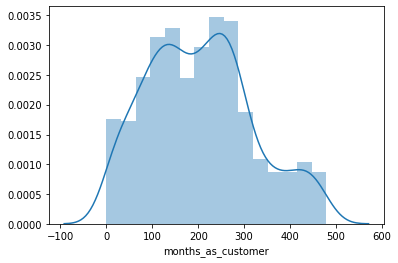

In [24]:
sns.distplot(data_raw['months_as_customer'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2506cd82b48>,
 'caps': [<matplotlib.lines.Line2D at 0x2506cd82ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2506cd82408>],
 'medians': [<matplotlib.lines.Line2D at 0x2506cd87a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2506cd87f48>],
 'means': []}

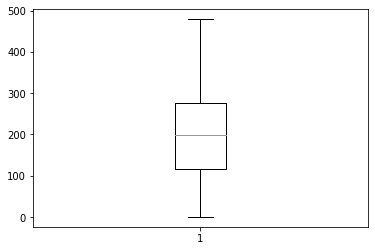

In [25]:
plt.boxplot(data_raw['months_as_customer'])

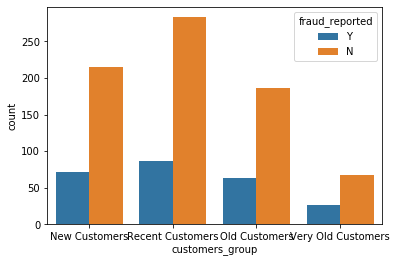

In [30]:
#Binning Feature into Logical Categries
bins = [0, 126, 251, 376, 500]
labels = ['New Customers', 'Recent Customers', 'Old Customers', 'Very Old Customers']
data_raw['customers_group'] = pd.cut(data_raw['months_as_customer'], bins, labels=labels)

#Countplot for the variable
sns.countplot(x='customers_group', hue='fraud_reported', data = data_raw)

## 2.2. Feature: age

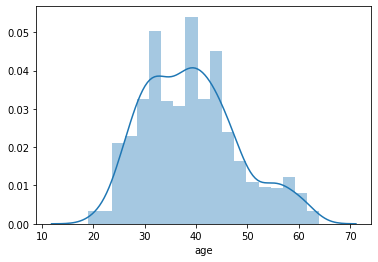

In [28]:
#Distribution PLot for the variable
sns.distplot(data_raw['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2506d03f508>,
 'caps': [<matplotlib.lines.Line2D at 0x2506d03ffc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2506d039d48>],
 'medians': [<matplotlib.lines.Line2D at 0x2506d046b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2506d046f08>],
 'means': []}

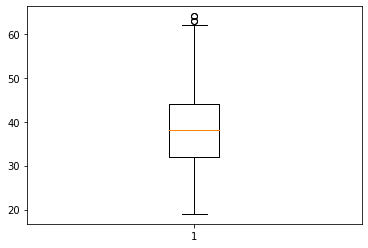

In [29]:
#Boxplot for the variable
plt.boxplot(data_raw['age'])

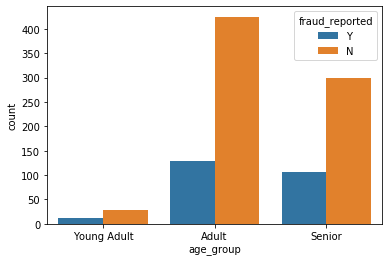

In [31]:
#Binning Feature into Logical Categories
bins = [18, 25, 40, 65]
labels = ['Young Adult', 'Adult', 'Senior']
data_raw['age_group'] = pd.cut(data_raw['age'], bins, labels=labels)

#Countplot for the feature
sns.countplot(x='age_group', hue='fraud_reported', data=data_raw)

## 2.3. Feature: policy_number

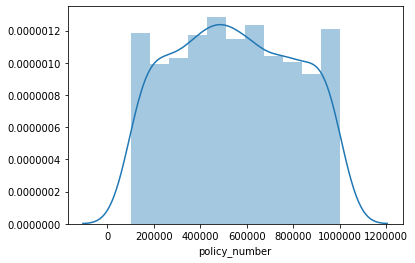

In [33]:
#Distribution Plot for the Feature
sns.distplot(data_raw['policy_number'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2506d2175c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2506d217e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2506d214bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2506d21ae08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2506d21fc88>],
 'means': []}

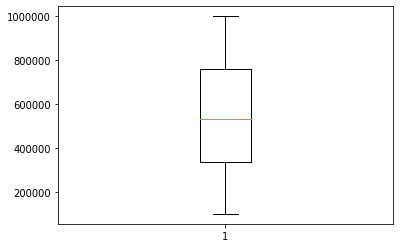

In [34]:
#Boxplot for the Feature
plt.boxplot(data_raw['policy_number'])

In [ ]:
#Binning Feature into Logical Categories
bins = [100000, 250001, 500001, 750001, 1000000]
labels = []